<a href="https://colab.research.google.com/github/MaxTTG/Keras-MNIST/blob/main/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1)

# Загрузка данных MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Преобразование матрицы в вектор
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

# One-hot кодирование
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# Вывод информации о данных
print("Форма обучающей выборки:", x_train.shape, y_train.shape)
print("Форма тестовой выборки:", x_test.shape, y_test.shape)

Форма обучающей выборки: (60000, 784) (60000, 10)
Форма тестовой выборки: (10000, 784) (10000, 10)


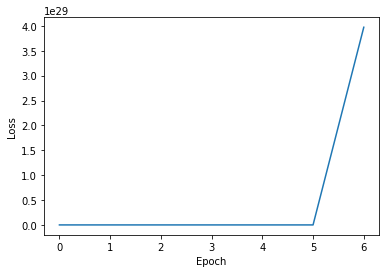

In [ ]:
# Гиперпараметры
learning_rate = 0.1
input_size = 28 * 28
hidden_size = 50
output_size = 10
num_epochs = 5
batch_size = 10

# Веса
weights_0_1 = 0.2 * np.random.random((input_size, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, output_size)) - 0.1


# Функция активации
def ReLU(x):
    return np.maximum(0, x)

def ReLUderiv(x):
    return x >= 0


# Функция обучения
def train(epochs: int, weights_0_1=weights_0_1, weights_1_2=weights_1_2):
    losses_train = []
    accuracy_train = []
    acc = 0
    for epoch in range(num_epochs):
        for i in range(len(x_train)):
            layer_0 = x_train[i]
            layer_1 = ReLU(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            error = np.sum((layer_2 - y_train[i]) ** 2)

            layer_2_delta = y_train[i] - layer_2

            layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * ReLUderiv(layer_1)

            weight_1_2_corrections = np.dot(layer_1.reshape((hidden_size, 1)), tf.reshape(layer_2_delta, ((1, output_size))))
            weight_0_1_corrections = np.dot(layer_0.reshape((input_size, 1)), tf.reshape(layer_1_delta,((1, hidden_size))))

            weights_1_2 -= learning_rate * weight_1_2_corrections
            weights_0_1 -= learning_rate * weight_0_1_corrections

            if tf.math.argmax(y_train[i]) == tf.math.argmax(layer_2):
                acc += 1
            losses_train.append(error)
            accuracy_train.append(acc / (i + 1))



    return losses_train, accuracy_train


# Функция предсказывания
def predict(x):
    layer_0 = x
    layer_1 = ReLU(np.dot(layer_0, weights_0_1))
    return np.dot(layer_1, weights_1_2)


loss_train = []
acc_train = []
loss_test = []
acc_test = []

loss_train, acc_train = train(num_epochs)
plt.plot(loss_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(acc_train)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

# Функция обучения с батчами
def train_batch(epochs: int, batch_size: int, weights_0_1=weights_0_1, weights_1_2=weights_1_2):
    losses_train = []
    accuracy_train = []
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            batch_x = x_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            layer_0 = batch_x
            layer_1 = ReLU(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)
            error = (layer_2 - batch_y) ** 2 / len(batch_x)

            loss = np.mean(error)
            losses_train.append(loss)

            layer_2_delta = layer_2 - batch_y
            layer_1_delta = np.dot(layer_2_delta, weights_1_2.T) * layer_1

            weight_1_2_corrections = layer_1.T.dot(layer_2_delta)
            weight_0_1_corrections = layer_0.T.dot(layer_1_delta)

            weights_1_2 -= learning_rate * weight_1_2_corrections
            weights_0_1 -= learning_rate * weight_0_1_corrections

            predicted_labels = np.argmax(layer_2, axis=1)
            true_labels = np.argmax(batch_y, axis=1)
            correct_predictions = (predicted_labels == true_labels).sum()
            acc = correct_predictions / len(true_labels)
            accuracy_train.append(acc)
    return losses_train, accuracy_train